In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn

In [ ]:
#sckit learn---> import sklearn
#pip install scikit-learn

In [ ]:
df=pd.read_csv('International_Education_Costs.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df['Country'].value_counts()

In [ ]:
df[df['Country']=='India'].head(12)

In [ ]:
df['City'].value_counts()

In [ ]:
df['Program'].value_counts().head(10)

In [ ]:
df['Duration_Years'].mean()

In [ ]:
df['Duration_Years'].max()

In [ ]:
df['Duration_Years'].min()

In [ ]:
#isnull()--> if we are having any missing value in our dataframe or not
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df['Duration_Years']=df['Duration_Years'].astype('float32')

In [ ]:
df['Tuition_USD']=df['Tuition_USD'].astype('int32')

In [ ]:
df['Rent_USD']=df['Rent_USD'].astype('int32')
df['Visa_Fee_USD']=df['Visa_Fee_USD'].astype('int32')
df['Insurance_USD']=df['Insurance_USD'].astype('int32')

In [ ]:
df.info()

In [ ]:
#exploratory data analysis (EDA)


In [ ]:
df['Country'].value_counts().head(10)

In [ ]:
df['Country'].unique

In [ ]:
country=df[df['Country'].isin(['UK','Australia','USA','Canada','Germany','France','South Korea','Netherlands','Switzerland','Singapore'])]

In [ ]:
sns.countplot(data=country,x='Country')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['City'].value_counts().head()

In [ ]:
city=df[df['City'].isin(['Singapore','Sydney','Melbourne','London','Canberra'])]

In [ ]:
sns.countplot(data=df,x='Level')

In [ ]:
df['Duration_Years'].value_counts()

In [ ]:
d5=df[df['Level'].isin(['PhD','Bachelor','Master'])].head(150)

In [ ]:
d5.shape

In [ ]:
d5

In [ ]:
d1=df[df['Level']=='Master'].head(150)

In [ ]:
d2=df[df['Level']=='Bachelor'].head(150)

In [ ]:
d3=df[df['Level']=='PhD'].head(150)

In [ ]:
#important to remember
d4=pd.concat([d1,d2,d3])

In [ ]:
d4

In [ ]:
df.shape

In [ ]:
d4.shape

In [ ]:
sns.histplot(data=df,x='Duration_Years')

In [ ]:
sns.histplot(data=d4,x='Duration_Years')

In [ ]:
df.columns

In [ ]:
sns.histplot(data=df,x='Tuition_USD')

In [ ]:
sns.histplot(data=df,x='Rent_USD')
plt.show()

In [ ]:
sns.kdeplot(data=df,x='Rent_USD')
plt.grid()

In [ ]:
sns.boxplot(data=df,x='Rent_USD')
plt.grid()
plt.show()

In [ ]:
country

In [ ]:
sns.barplot(data=country,x='Country',y='Tuition_USD')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
country.head()

In [ ]:
sns.barplot(data=country,x='Country',y='Visa_Fee_USD')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['University'].value_counts().head(10)

In [ ]:
university=df[df['University'].isin(['University of Washington','Stanford University','Australian National University','University of Tasmania','University of Western Australia','University of Adelaide','Griffith University','University of Sydney'])]

In [ ]:
university.head()

In [ ]:
sns.barplot(data=university,x='University',y='Tuition_USD')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

In [ ]:
sns.barplot(data=university,x='University',y='Duration_Years',hue='Level')
plt.xticks(rotation=90)
plt.show()

In [ ]:
university.loc[university['University'] == 'Stanford University', 'Duration_Years',].value_counts()


In [ ]:
sns.lineplot(data=university,x='University',y='Duration_Years')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
sns.scatterplot(data=df,x='Duration_Years',y='Tuition_USD')

In [ ]:
country['Country'].value_counts()


In [ ]:
country['University'].value_counts().head(10)

In [ ]:
university=df[df['University'].isin(['University of Wollongong','University of Newcastle','University of Washington','Stanford University','Australian National University','University of Tasmania','University of Western Australia','University of Adelaide','Griffith University','University of Sydney'])]

In [ ]:
university

In [ ]:
#pivot table -> important to remember
data=university.pivot_table(index='Country',columns='University',values='Tuition_USD',aggfunc='mean')

In [ ]:
sns.heatmap(data,annot=False,cmap='viridis',linewidth=0.2)

In [ ]:
#Feature(column) engineering and model building
#input or output
df.head()

In [ ]:
df['Total Cost']=df['Tuition_USD']+df['Rent_USD']  

In [ ]:
df.head()

In [ ]:
#feature selection step
#removal of unwanted features
#df.drop(columns=['City','Program','University'],inplace=True)
df=df[['Country','City','University','Program','Level','Duration_Years','Living_Cost_Index','Insurance_USD','Total Cost'] ]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#lable encoding/feature encoding
#categorical data ko numerical data me convert karna via sklearn
#three ways to do label encoding
#1. label encoding
#2. one hot encoding
#3. ordinal encoding
from sklearn.calibration import LabelEncoder


le=LabelEncoder()

In [ ]:
df['Country']=le.fit_transform(df['Country'])

In [ ]:
df['City']=le.fit_transform(df['City'])

In [ ]:
df.head()

In [ ]:
df['University']=le.fit_transform(df['University'])

In [ ]:
df['Program']=le.fit_transform(df['Program'])

In [ ]:
df['Level']=le.fit_transform(df['Level'])

In [ ]:
df.head()

In [ ]:
#ordinal encoding is for good better best type of order of data
'''after lable encoding we can separate input and output features and then we can do train test split and then we can do model building'''

In [ ]:
x=df.iloc[:,0:8]
#y=df.iloc[:,-1]
y=df['Total Cost'] 

In [ ]:
x.info()

In [ ]:
x

In [ ]:
x.dtypes

In [ ]:
y

In [ ]:
'''Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is also known as normalization. The main purpose of feature scaling is to handle the varying magnitudes, units, and range of values of different features in the data.
1. Standardization - mean = 0 and standard deviation = 1
2. Normalization - scaling the data between 0 and 1
3. Min-Max Scaling
'''

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_scaled=s.fit_transform(x)

In [ ]:
x_scaled

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
u_train,u_test,v_train,v_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_test

In [ ]:
'''Model training and evaluation
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. elastic net regression
5. Decision Tree Regression
6. Random Forest Regression
7. xgboost regression
8. Aadaboost regression
9. catboost regression
10. Knn regression
11. Support Vector Regression
12. Bagging Regression
13. Stacking Regression

evaluation metrics
1. root mean squared error
2. mean absolute error
3. mean squared error
4. r2 score
'''

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
#evaluation metrics--> mean absolute error, mean squared error, root mean squared error, r2 score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))      
r2=r2_score(y_test,y_predict)

In [ ]:
mae

In [ ]:
mse

In [ ]:
rmse

In [ ]:
r2

Ridge

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=1.0)
r.fit(x_train,y_train)

In [ ]:
y_test

In [ ]:
y_predict=r.predict(x_test)
mean_absolute_error(y_test,y_predict)

Lasso

In [ ]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(x_train,y_train)


In [ ]:
y_predict=l.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_predict)

ElasticNet Alogrith

In [ ]:
from sklearn.linear_model import ElasticNet
e=ElasticNet(alpha=0.01,l1_ratio=0.5)
e.fit(x_train,y_train)

In [ ]:
y_predict=e.predict(x_test)
mean_absolute_error(y_test,y_predict)

## DecisionTree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5)      
dtr.fit(x_train,y_train)    

In [ ]:
dtr_predict=dtr.predict(x_test)

In [ ]:
mean_absolute_error(y_test,dtr_predict)

##RandomForest Regressor -  most important for classfication and regression --> combination of multiple algo ( decision tress)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=5)
rf.fit(x_train,y_train)

In [ ]:
y_test

In [ ]:
rf_predict=rf.predict(x_test)
mean_absolute_error(y_test,rf_predict)

In [ ]:
rf_predict

### Ensemble learning--> xgboost regressor
                    --> adaboos regressor
                    --> catboost regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.1)
ada.fit(x_train,y_train)    

In [ ]:
ada_predict=ada.predict(x_test)
mean_absolute_error(y_test,ada_predict) 

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5)
xgb.fit(x_train,y_train)

In [ ]:
xgb_predict=xgb.predict(x_test)
mean_absolute_error(y_test,xgb_predict) 

In [ ]:
# from catboost import CatBoostRegressor
# cat=CatBoostRegressor(iterations=100,learning_rate=0.1,depth=5,verbose=0)
# cat.fit(x_train,y_train)

### Kneighbors Regression  -> Neighbor data points -> neighbors prediction -> close prediction

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

In [ ]:
knn_predict=knn.predict(x_test)
mean_absolute_error(y_test,knn_predict)

## support vector machin-> support vector regressor

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)    

In [ ]:
svr_predict=svr.predict(x_test)
mean_absolute_error(y_test,svr_predict)

##Bagging regressor--> ensemble learning

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(n_estimators=100)
bag.fit(x_train,y_train)    

In [ ]:
bag_predict=bag.predict(x_test)
mean_absolute_error(y_test,bag_predict)

## stacking regressor--> ensemble learning-> combination of multiple models of our choice

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
estimators=[('rf',RandomForestRegressor(n_estimators=100,max_depth=5)),
            ('bag',BaggingRegressor(n_estimators=100))]
stack=StackingRegressor(estimators=estimators,final_estimator=DecisionTreeRegressor(max_depth=5))
stack.fit(x_train,y_train)

In [ ]:
stack_predict=stack.predict(x_test)
mean_absolute_error(y_test,stack_predict)   

###classification
1. logistic regression
2. Decision tree classifier
3. Random Forest Classifier
4. AdaBoost Classifier
5. Catboost classifier
6. Kneighbors classifier
7. Support vector classifier
8. Bernoulli Naive Bayes 
9. XGB Classifier
10. Multinomial naive bayes
11. Bagging classifier
12. Stacking Classifier  

Evaluation Metrics
1. Accuracy score
2. precision
3. Recall
4. F1 score
5. Confusion Matrix( heat map)

In [ ]:
st=pd.read_csv('D:/visual studio/Module and packages/Pandas/student_depression_dataset.csv')

In [ ]:
st.head()

In [ ]:
st.info()

In [ ]:
st.columns

In [ ]:
#Feature selection step
st=st[[ 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure','CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Work/Study Hours','Financial Stress', 'Family History of Mental Illness', 'Depression']]

In [ ]:
##Label encoding and Data encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [ ]:
st['Gender']=l.fit_transform(st['Gender'])

In [ ]:
st['City']=l.fit_transform(st['City'])

In [ ]:
st['Profession']=l.fit_transform(st['Profession'])

In [ ]:
st['Sleep Duration']=l.fit_transform(st['Sleep Duration'])

In [ ]:
st['Dietary Habits']=l.fit_transform(st['Dietary Habits'])

In [ ]:
st['Family History of Mental Illness']=l.fit_transform(st['Family History of Mental Illness'])

In [ ]:
st.isnull().sum()

In [ ]:
st.head()

In [ ]:
st.info()

In [ ]:
st['Financial Stress'].value_counts()

In [ ]:
st=st[st['Financial Stress']!='?']

In [ ]:
st.info()

In [ ]:
st['Financial Stress']=st['Financial Stress'].astype('float32')

In [ ]:
st.info()

In [ ]:
st.columns

In [ ]:
#separating input and output features / Data
x=st[['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness']]

In [ ]:
y=st['Depression']

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_scaled=s.fit_transform(x)

In [ ]:
y

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)        

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) 

In [ ]:
y_predicts=lr.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [ ]:
accuscore=accuracy_score(y_test,y_predicts)
#cm=confusion_matrix(y_test,y_predicts)
#cr=classification_report(y_test,y_predicts)

In [ ]:
accuscore

In [ ]:
##decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=5) 

In [ ]:
dtc.fit(x_train,y_train)

In [ ]:
dtc_predict=dtc.predict(x_test)
accuscore=accuracy_score(y_test,dtc_predict)

In [ ]:
accuscore

In [ ]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

In [ ]:
y_predict=forest.predict(x_test)
accuscore=accuracy_score(y_test,y_predict)

In [ ]:
accuscore

In [ ]:
#XGB classifier
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5)
xgb.fit(x_train,y_train)

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=100,learning_rate=0.1,depth=5,verbose=0)
cat.fit(x_train,y_train)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
ada.fit(x_train,y_train)

In [ ]:
ada_predict=ada.predict(x_test)
accuracy_score(y_test,ada_predict)

In [ ]:
#KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)    

In [ ]:
knn_predict=knn.predict(x_test)
accuracy_score(y_test,knn_predict)  

In [ ]:
#Support Vector Machine Classifier
from sklearn.svm import SVC 
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)    

In [ ]:
svm_predict=svm.predict(x_test)
accuracy_score(y_test,svm_predict)

In [ ]:
#naive bayes classifier
'''
1. bernoulli naive bayes
2. multinomial naive bayes'''
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
#mnb=MultinomialNB() 
bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)


In [ ]:
bnb_predict=bnb.predict(x_test)
accuracy_score(y_test,bnb_predict)

In [ ]:
#mnb=MultinomialNB() 


In [ ]:
#bagging classifier
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(n_estimators=100)
bag.fit(x_train,y_train)    

In [ ]:
bag_predict=bag.predict(x_test)
accuracy_score(y_test,bag_predict)

In [ ]:
#stacking classifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier
# estimators=[('rf',RandomForestClassifier(n_estimators=100,max_depth=5)),
#             ('bag',BaggingClassifier(n_estimators=100))]
estimators=[('lr',LogisticRegression()),('svm',SVC(kernel='rbf'))]
stack=StackingClassifier(estimators=estimators,final_estimator=AdaBoostClassifier(n_estimators=100,learning_rate=0.1))
stack.fit(x_train,y_train)  
stack_predict=stack.predict(x_test)
accuracy_score(y_test,stack_predict)    



Hyper Parametr Tuning - Applicable for machine learning ,deep learning and NLP
Every algo parmeters-> ensemble learning-> n-estimators=100

Randome Forest is combination of multiple decision tree -> maxdepth=5 or 10,15

what should be max -depth ?
how many no of decision tress is req > Random forest -> to get the best accuracy

In [197]:
u_train

array([[-0.57482992, -1.69329045, -0.39380795, ...,  0.17268546,
         0.1396948 , -0.46870086],
       [ 0.95861342,  1.14892095, -1.02404452, ..., -0.88559636,
         0.52407523, -0.93716069],
       [ 0.61784824,  0.85133899, -1.13461234, ..., -0.88559636,
        -0.30874904, -0.93716069],
       ...,
       [-0.61742557,  0.09220133,  1.60746958, ..., -0.88559636,
         0.79456517,  0.4682188 ],
       [-1.12857335,  0.69343836, -0.87477797, ...,  0.17268546,
        -0.16638592,  0.15591225],
       [ 1.25678296, -0.08391861,  0.82796645, ...,  0.17268546,
         0.09698586,  0.31206552]], shape=(725, 8))

In [198]:
v_train

84      1200
10      1200
616     5550
250    29700
478    34100
       ...  
106    33300
270    23550
860     5400
435    34900
102    29450
Name: Total Cost, Length: 725, dtype: int32

In [199]:
from matplotlib.pyplot import grid
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid={'n_estimators':[100,200],'max_depth':[4,6,8]}
grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5)
#grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
grid.fit(u_train,v_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [4, 6, ...], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold

In [200]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 8, 'n_estimators': 200}
0.9264963228467609


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# param_grid={'n_estimators':[50,100,200],'max_depth':[4,6,8]}
# random=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid,n_iter=10,cv=5)


In [ ]:
# random.fit(x_train,y_train)


In [ ]:
# print(random.best_params_)
# print(random.best_score_)

In [201]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid={'n_estimators':[100,200],'max_depth':[4,6,8]}
random=RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid,n_iter=10,cv=5)


In [204]:
print(random.best_params_)
print(random.best_score_)

{'n_estimators': 100, 'max_depth': 8}
0.9270540644508257


In [203]:
random.fit(u_train,v_train)

d:\visual studio\.venv\Lib\site-packages\sklearn\model_selection\_search.py:324: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [4, 6, ...], 'n_estimators': [100, 200]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5

In [205]:
random_predict=random.predict(u_test)
mean_absolute_error(v_test,random_predict)

3010.795414211712

In [ ]:
# rf.predict(x_test)
# mean_absolute_error(y_test,rf.predict(x_test))

In [206]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(random,f)

In [207]:
with open('model.pkl','rb') as f:
    new_model=pickle.load(f)

In [208]:
new_model

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [4, 6, ...], 'n_estimators': [100, 200]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5

In [219]:
# Make predictions for university data
# Since university dataframe may contain different categorical values,
# we need to ensure it has the same format as training data

# Create a copy and apply label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
university_encoded = university.copy()

# Get the categorical columns
categorical_cols = ['Country', 'City', 'University', 'Program', 'Level']

# Create new encoders or use existing ones
le_temp = LabelEncoder()
for col in categorical_cols:
    university_encoded[col] = le_temp.fit_transform(university_encoded[col])

# Scale the features
university_scaled = s.transform(university_encoded[['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Living_Cost_Index', 'Insurance_USD']])

# Make predictions
predictions = new_model.predict(university_scaled)

In [220]:
# Create a dataframe with university info and predictions
results_df = university[['Country', 'City', 'University', 'Program', 'Level']].copy()
results_df['Predicted_Total_Cost'] = predictions

# Sort by predicted total cost and get top 5
top_5 = results_df.nlargest(5, 'Predicted_Total_Cost')
print("Top 5 Universities with Highest Predicted Total Cost:")
print(top_5.to_string())

Top 5 Universities with Highest Predicted Total Cost:
    Country           City                University           Program   Level  Predicted_Total_Cost
898     USA  San Francisco       Stanford University      Data Science  Master          45676.654329
41      USA        Seattle  University of Washington  Computer Science  Master          45406.187662
856     USA       Stanford       Stanford University  Computer Science     PhD          43982.199567
29      USA       Stanford       Stanford University  Computer Science     PhD          43974.199567
402     USA       Stanford       Stanford University           Physics     PhD          43924.199567


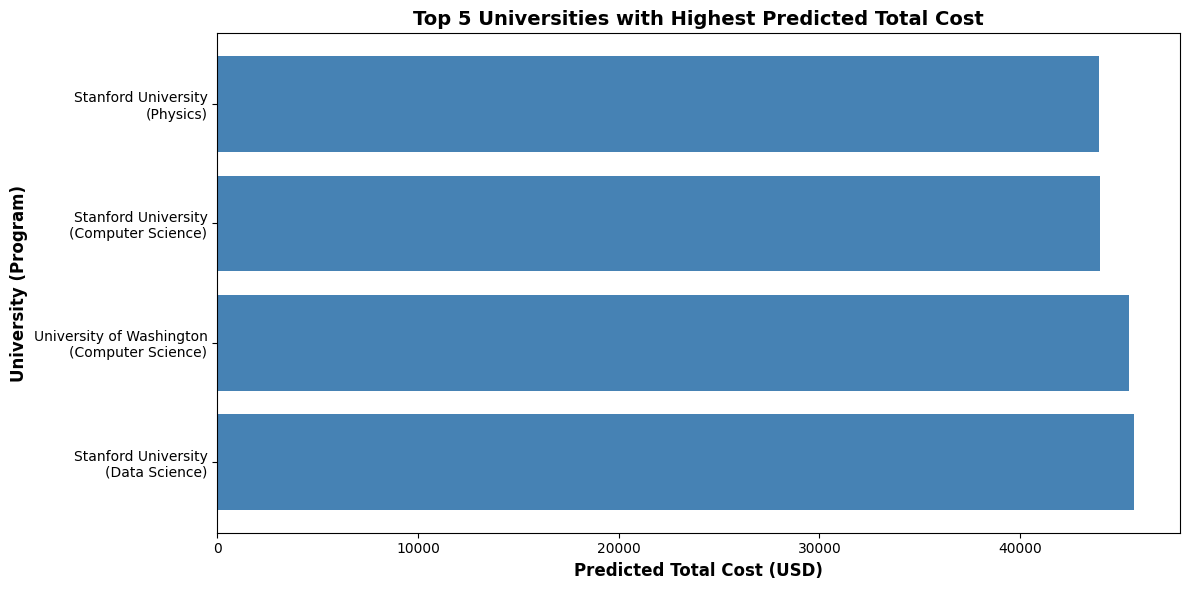

In [221]:
# Visualize top 5 universities by predicted total cost
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_5_display = results_df.nlargest(5, 'Predicted_Total_Cost')
# Create a meaningful label combining university and program
labels = [f"{row['University']}\n({row['Program']})" for _, row in top_5_display.iterrows()]
plt.barh(labels, top_5_display['Predicted_Total_Cost'], color='steelblue')
plt.xlabel('Predicted Total Cost (USD)', fontsize=12, fontweight='bold')
plt.ylabel('University (Program)', fontsize=12, fontweight='bold')
plt.title('Top 5 Universities with Highest Predicted Total Cost', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()